In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
statistics_folder = r'c:/users/andrea petreti/documents/tesi_robotics/statistics/task1/'
csv_header = ['generation', 'fitness', 'score', 'genome']

In [3]:
#result_task1_nodes50_k3_bias0.21_prox0_p80_g100_pM0.03_pC0_el5_trials3_21-39_19-01.csv
def extract_info(filename, prefix = ''):
    pieces = filename.replace(prefix, '').split('_')
    return {
        'nodes': pieces[2][5:],
        'k': pieces[3][1:],
        'bias': pieces[4][4:],
        'proximity': pieces[5][4:],
        'population': pieces[6][1:],
        'generations': pieces[7][1:],
        'mutation': pieces[8][2:],
        'crossover': pieces[9][2:],
        'elitism': pieces[10][2:],
        'trials': pieces[11][6:]
    }

def get_legend(filename, prefix=''):
    info = extract_info(filename, prefix)
    return "Prox: %s\nGen: %s\nBias: %s\nMut: %s\nCross: %s\nPop: %s" % (info['proximity'],info['generations'], info['bias'], info['mutation'], info['crossover'], info['population'])
    

In [4]:
def avg_fitness(filename, figsize=(20,10), ax=None):
    data = pd.read_csv(filename, ";", skiprows=1, index_col=False, names=csv_header);
    data = data.drop(['genome'], axis=1)
    print(data)
    avg = data.groupby(['generation']).mean()
    if (ax == None):
        fig, ax = plt.subplots(figsize=figsize)
    avg.plot(ax=ax)
    ax.set_title("Avg Fitness\n ")# + extract_title(filename))
    ax.grid()
    ax.set_xticks(np.arange(0, 101, step=1))
    return ax


In [5]:
def compare_avg_fitness(*filenames, figsize=(20,10), **kwargs):
    fig, ax = plt.subplots(figsize=figsize)
    legend_labels = []
    for filename in filenames:
        data = pd.read_csv(filename, ";", skiprows=1, index_col=False, names=csv_header)
        data = data.drop(['genome', 'score'], axis=1)
        avg = data.groupby(['generation']).mean()
        avg.plot(ax=ax, **kwargs)
        legend_labels.append(get_legend(filename).replace('\n', ' '))
    ax.set_title("Compare Avg Fitness\n ")
    ax.grid()
    #ax.set_xticks(np.arange(0, 81, step=1))
    ax.legend(labels=legend_labels)
    ax.set_xlabel("Generation")
    ax.set_ylabel("Performance")
    return data
        

In [6]:
def plot_test(*filenames, figsize=(25,10), outliers=True, **kwargs):
    finaldata = pd.DataFrame()
    for filename in filenames:
        data = pd.read_csv(filename, ";")
        data['info'] = np.full((len(data), 1), get_legend(filename, 'result_'))
        finaldata = finaldata.append(data)
    
    fig, ax = plt.subplots(figsize=figsize)
    bp = finaldata.boxplot('score', 'info', ax=ax, showfliers=outliers, notch=True, **kwargs)
    ax.set_title("Performance Test")
    ax.set_xlabel("Configurations")
    ax.set_ylabel("Performance")
    return bp

## Task1

,generation,fitness
0,0,0.011111
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000
...,...,...
8075,100,0.911111
8076,100,0.911111
8077,100,0.911111
8078,100,0.911111


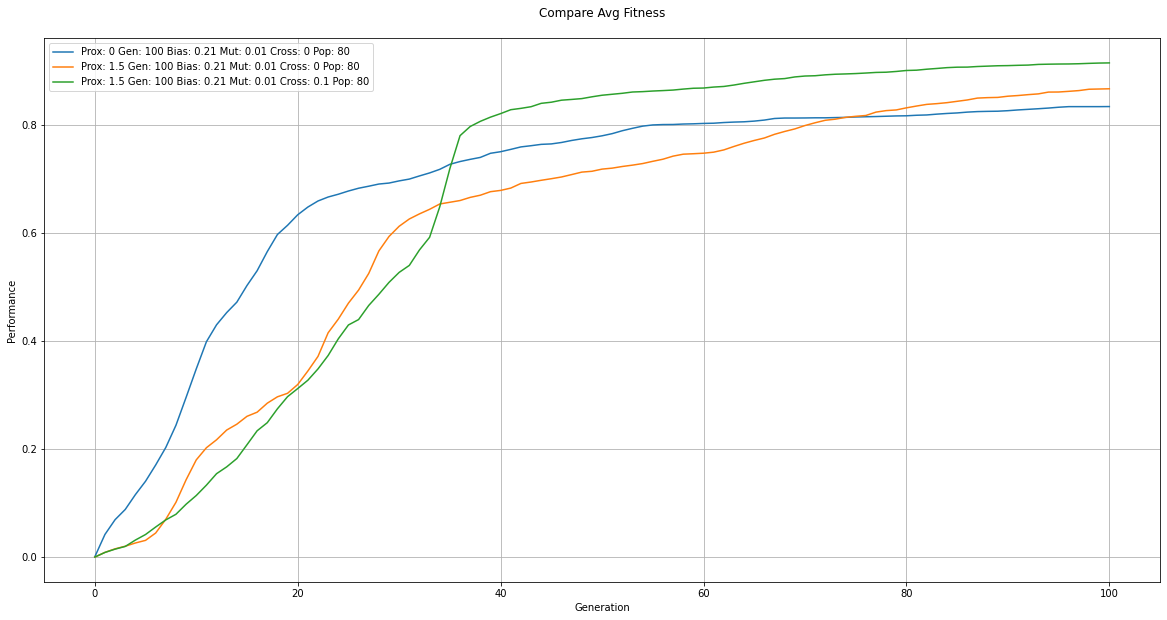

In [7]:
compare_avg_fitness(statistics_folder + "task1_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_08-48_20-01.csv",
                    statistics_folder + "task1_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_10-41_20-01.csv",
                    statistics_folder + "task1_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_11-51_20-01.csv")

<AxesSubplot:title={'center':'Performance Test'}, xlabel='Configurations', ylabel='Performance'>

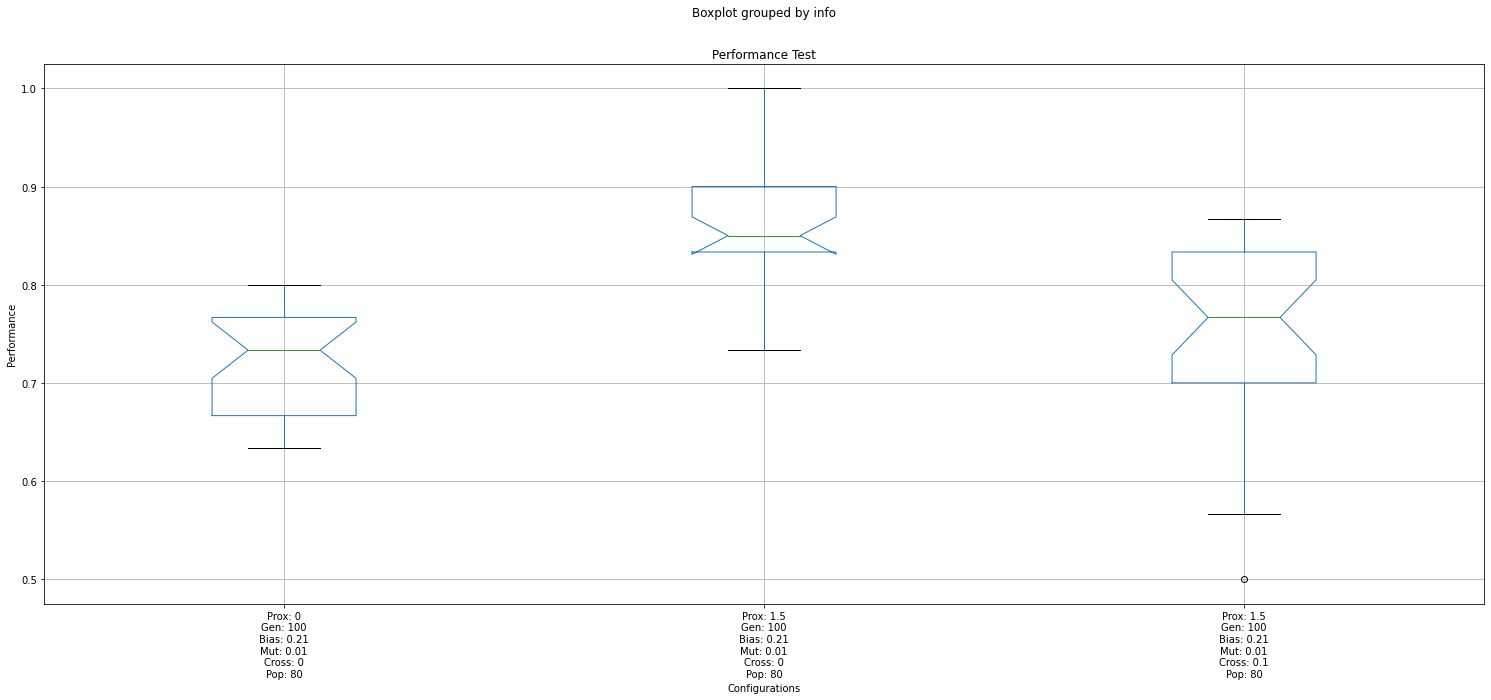

In [8]:
plot_test(
    statistics_folder + "result_task1_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_08-48_20-01_best_all.csv",
    statistics_folder + "result_task1_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_10-41_20-01_best_all.csv",
    statistics_folder + "result_task1_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_11-51_20-01_best_all.csv"
)

# Task1 

In [9]:
statistics_folder = r'c:/users/andrea petreti/documents/tesi_robotics/statistics/new_task1/'

,generation,fitness
0,0,0.055556
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000
...,...,...
8095,80,0.733333
8096,80,0.733333
8097,80,0.733333
8098,80,0.733333


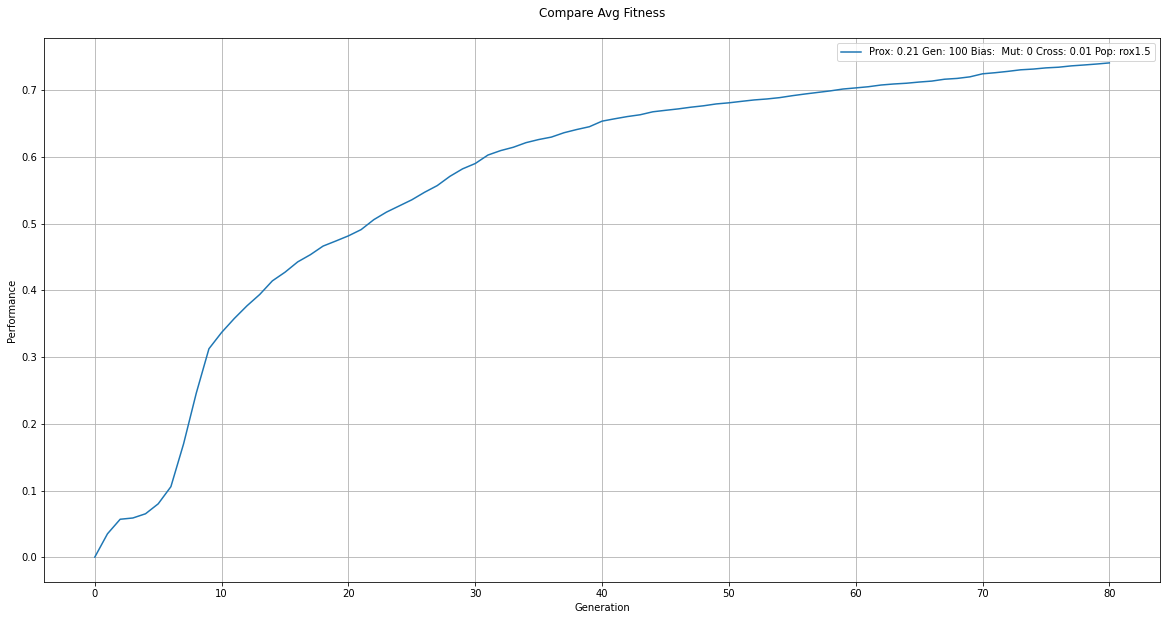

In [10]:
compare_avg_fitness(
    statistics_folder + "task1_nodes50_k3_bias0.21_prox1.5_p100_g80_pM0.01_pC0_el5_trials3_15-02_22-01.csv"
)

<AxesSubplot:title={'center':'Performance Test'}, xlabel='Configurations', ylabel='Performance'>

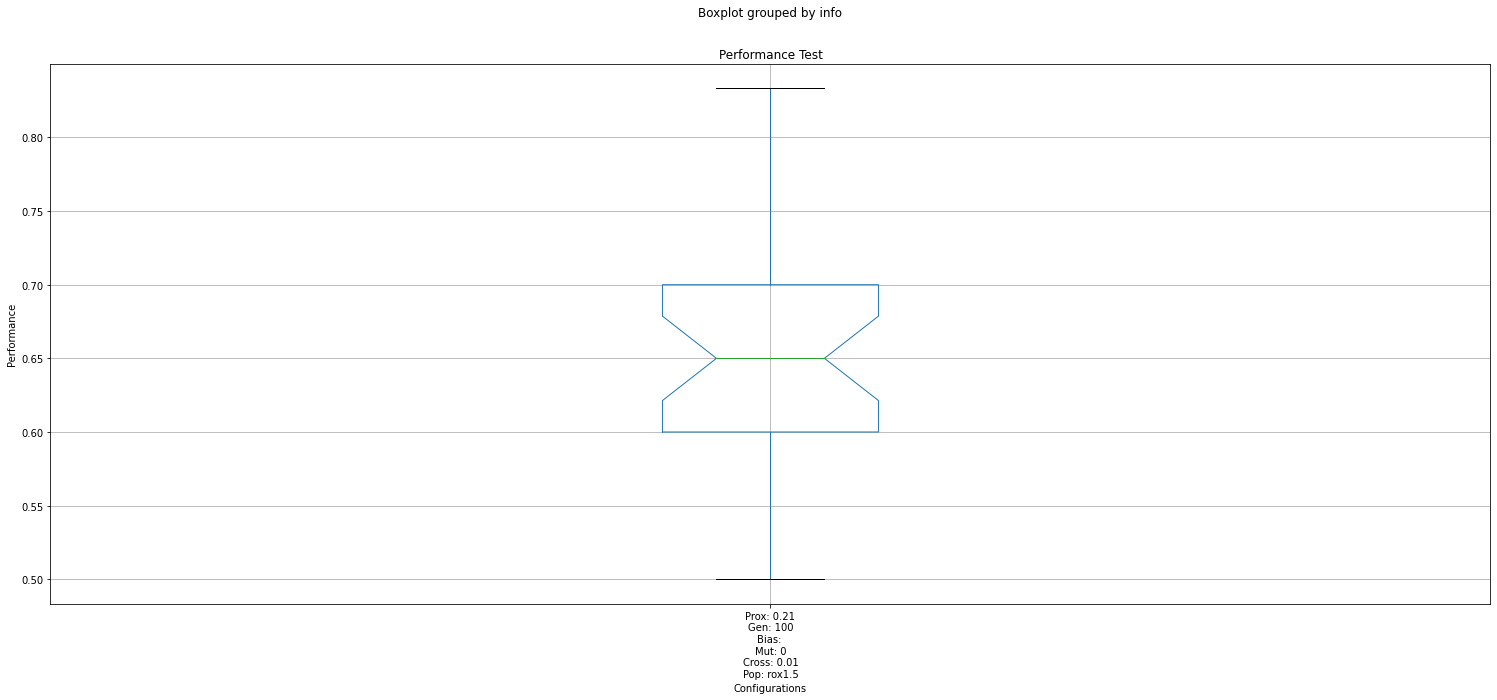

In [11]:
plot_test(
    statistics_folder + "result_task1_nodes50_k3_bias0.21_prox1.5_p100_g80_pM0.01_pC0_el5_trials3_15-02_22-01.csv"
)

# Task2

In [9]:
statistics_folder = r'c:/users/andrea petreti/documents/tesi_robotics/statistics/task2/'

,generation,fitness
0,0,0.255556
1,0,0.044444
2,0,0.011111
3,0,0.000000
4,0,0.000000
...,...,...
8095,80,0.844444
8096,80,0.844444
8097,80,0.844444
8098,80,0.844444


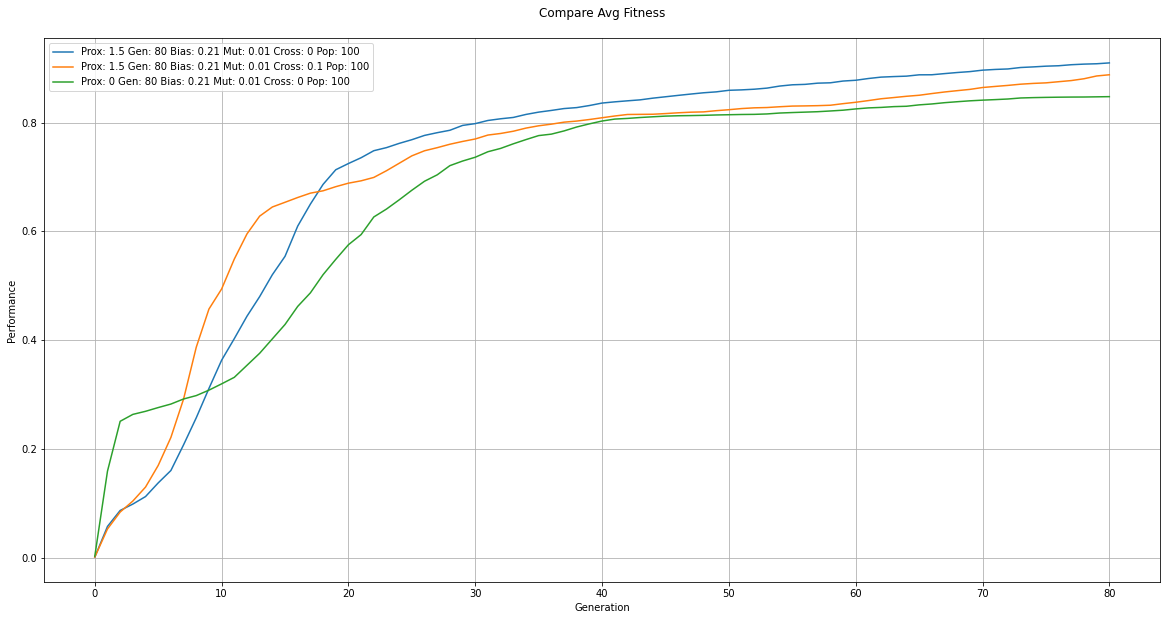

In [10]:
compare_avg_fitness(
    statistics_folder + "task2_nodes50_k3_bias0.21_prox1.5_p100_g80_pM0.01_pC0_el5_trials3_11-16_22-01.csv",
    statistics_folder + "task2_nodes50_k3_bias0.21_prox1.5_p100_g80_pM0.01_pC0.1_el5_trials3_13-48_22-01.csv",
    statistics_folder + "task2_nodes50_k3_bias0.21_prox0_p100_g80_pM0.01_pC0_el5_trials3_15-30_22-01.csv",
    #statistics_folder + "task2_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_17-18_22-01.csv",
    #statistics_folder + "task2_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_22-42_22-01.csv"
)

<AxesSubplot:title={'center':'Performance Test'}, xlabel='Configurations', ylabel='Performance'>

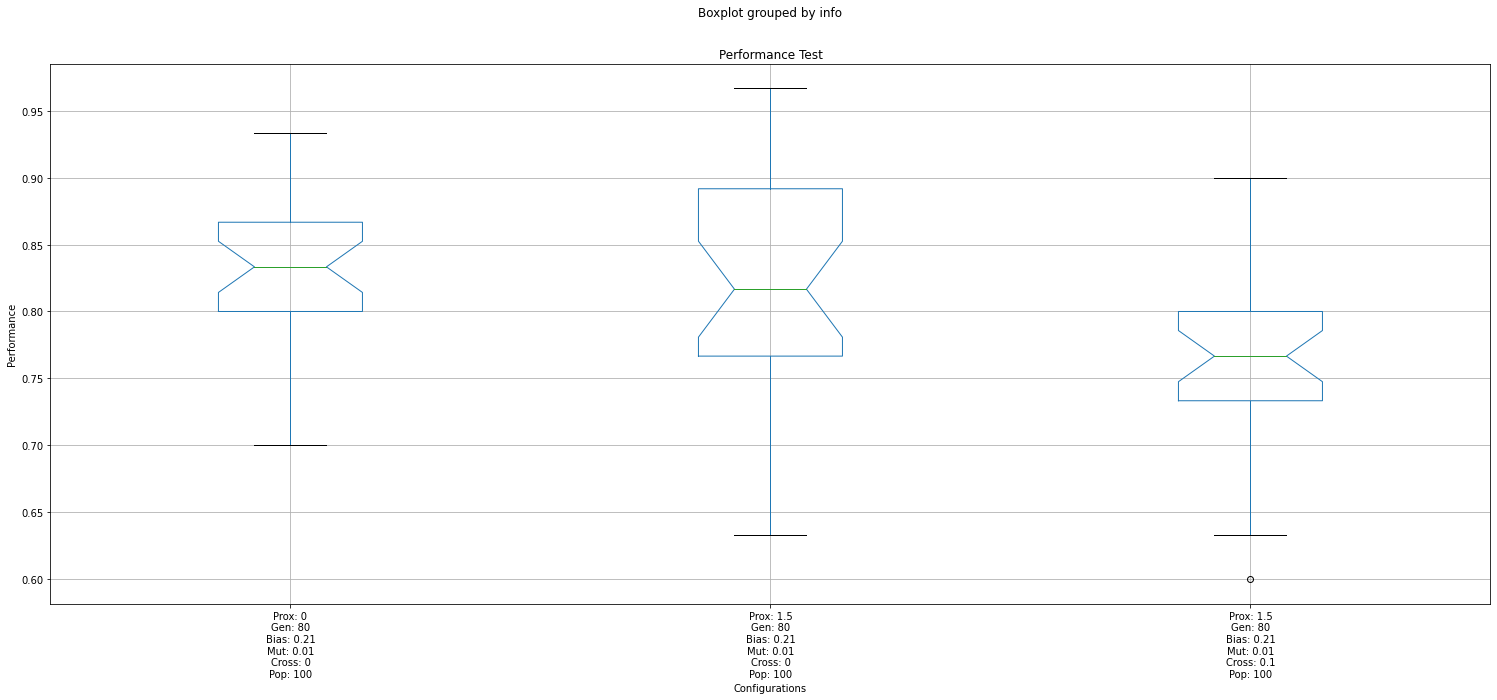

In [22]:
plot_test(
    statistics_folder + "result_task2_nodes50_k3_bias0.21_prox1.5_p100_g80_pM0.01_pC0_el5_trials3_11-16_22-01_best_all.csv",
    statistics_folder + "result_task2_nodes50_k3_bias0.21_prox1.5_p100_g80_pM0.01_pC0.1_el5_trials3_13-48_22-01_best_all.csv",
    statistics_folder + "result_task2_nodes50_k3_bias0.21_prox0_p100_g80_pM0.01_pC0_el5_trials3_15-30_22-01.csv",
    #statistics_folder + "result_task2_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_17-18_22-01.csv",
    #statistics_folder + "result_task2_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_22-42_22-01.csv"
)

## Task 3

In [7]:
statistics_folder = r'c:/users/andrea petreti/documents/tesi_robotics/statistics/task3/'

,generation,fitness
0,0,0.077778
1,0,0.044444
2,0,0.044444
3,0,0.044444
4,0,0.044444
...,...,...
8075,100,0.488889
8076,100,0.488889
8077,100,0.488889
8078,100,0.488889


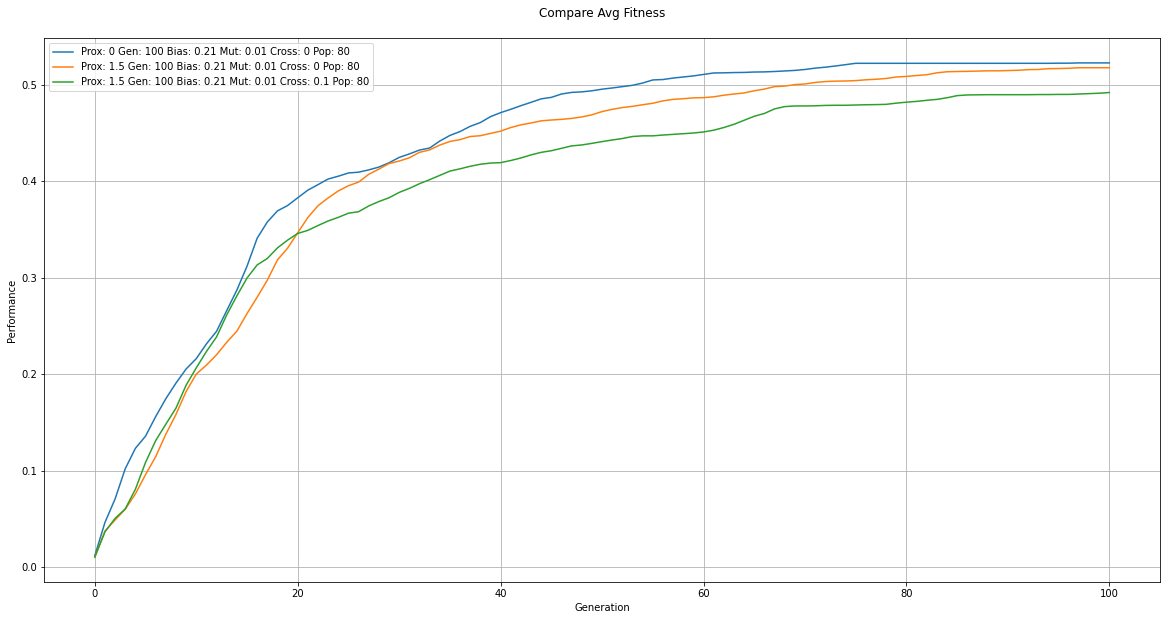

In [8]:
compare_avg_fitness(
    statistics_folder + "task3_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_12-30_23-01.csv",
    statistics_folder + "task3_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_10-17_23-01.csv",
    #statistics_folder + "task3_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0.1_el5_trials3_14-01_23-01.csv"
    statistics_folder + "task3_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_21-16_24-01.csv"
)

<AxesSubplot:title={'center':'Performance Test'}, xlabel='Configurations', ylabel='Performance'>

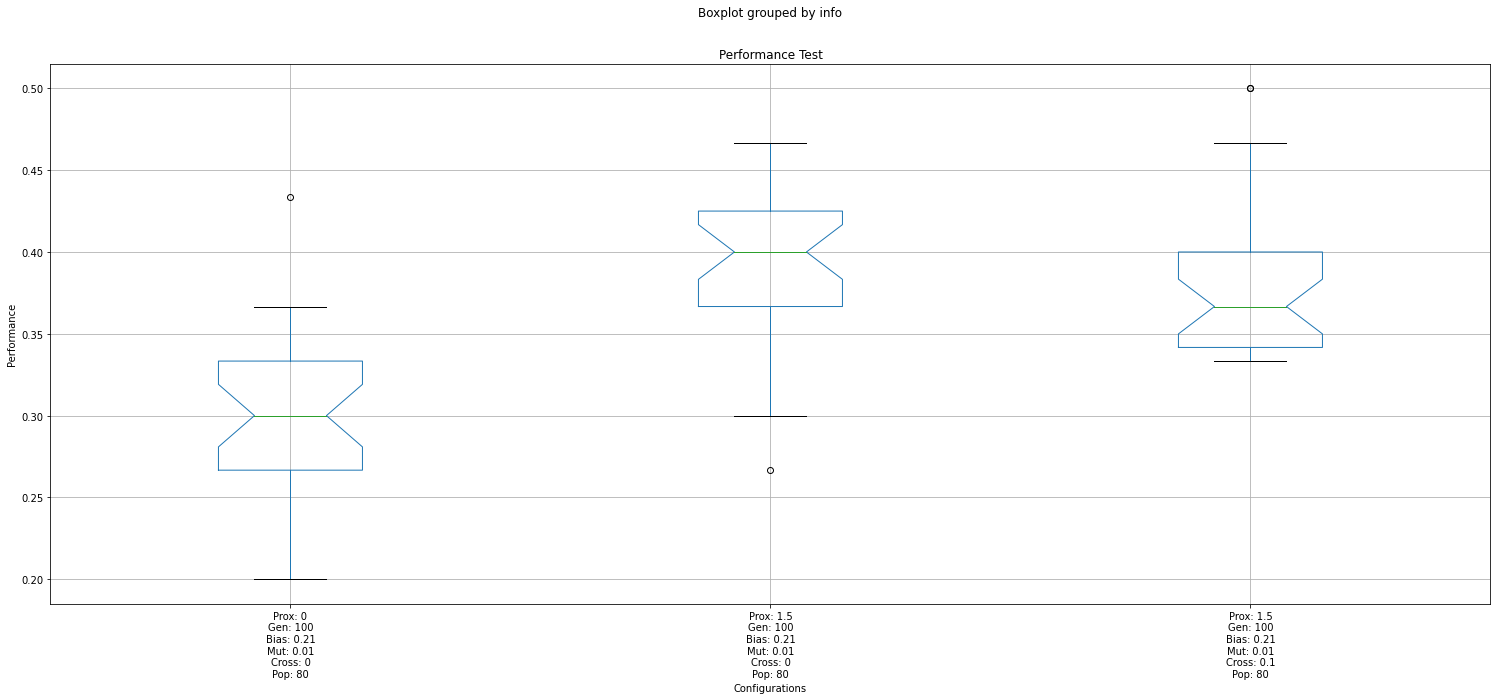

In [12]:
plot_test(
    statistics_folder+ "result_task3_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_10-17_23-01.csv",
    statistics_folder + "result_task3_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_12-30_23-01.csv",
    statistics_folder +  "result_task3_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_21-16_24-01.csv"
)

## Task 4

In [7]:
statistics_folder = r'c:/users/andrea petreti/documents/tesi_robotics/statistics/task4/'

,generation,fitness
0,0,0.044444
1,0,0.033333
2,0,0.033333
3,0,0.033333
4,0,0.033333
...,...,...
8075,100,0.611111
8076,100,0.611111
8077,100,0.611111
8078,100,0.611111


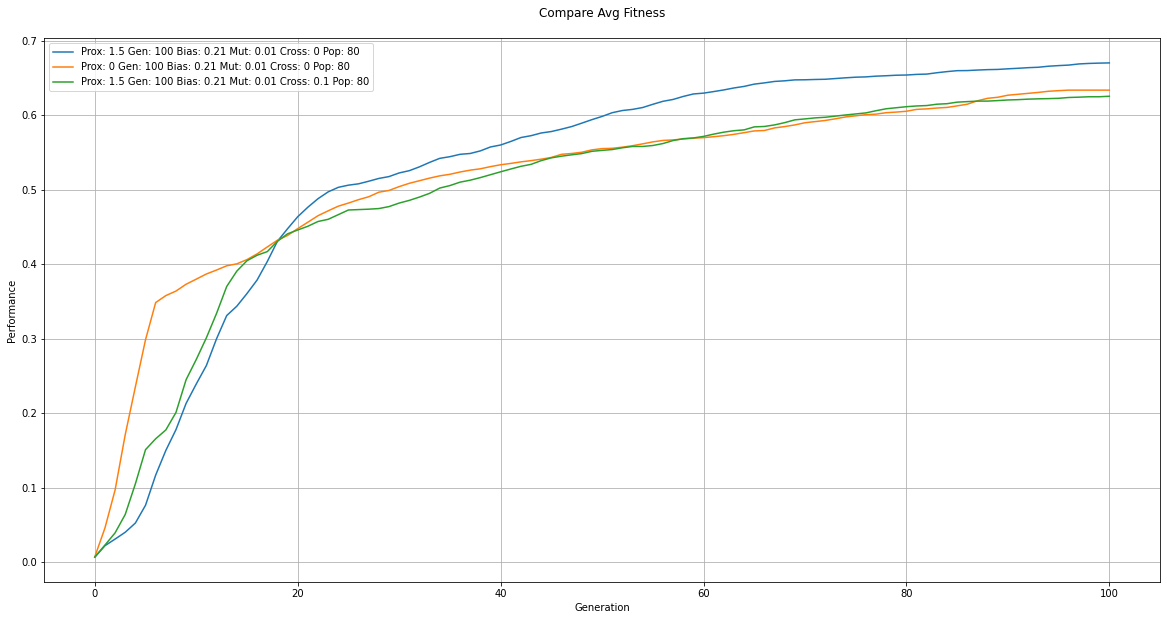

In [15]:
compare_avg_fitness(
    statistics_folder + "task4_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_18-14_26-01.csv",
    statistics_folder + "task4_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_19-52_26-01.csv",
    #statistics_folder + "task4_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0.1_el5_trials3_21-11_26-01.csv",
    statistics_folder + "task4_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_22-24_26-01.csv"
)

<AxesSubplot:title={'center':'Performance Test'}, xlabel='Configurations', ylabel='Performance'>

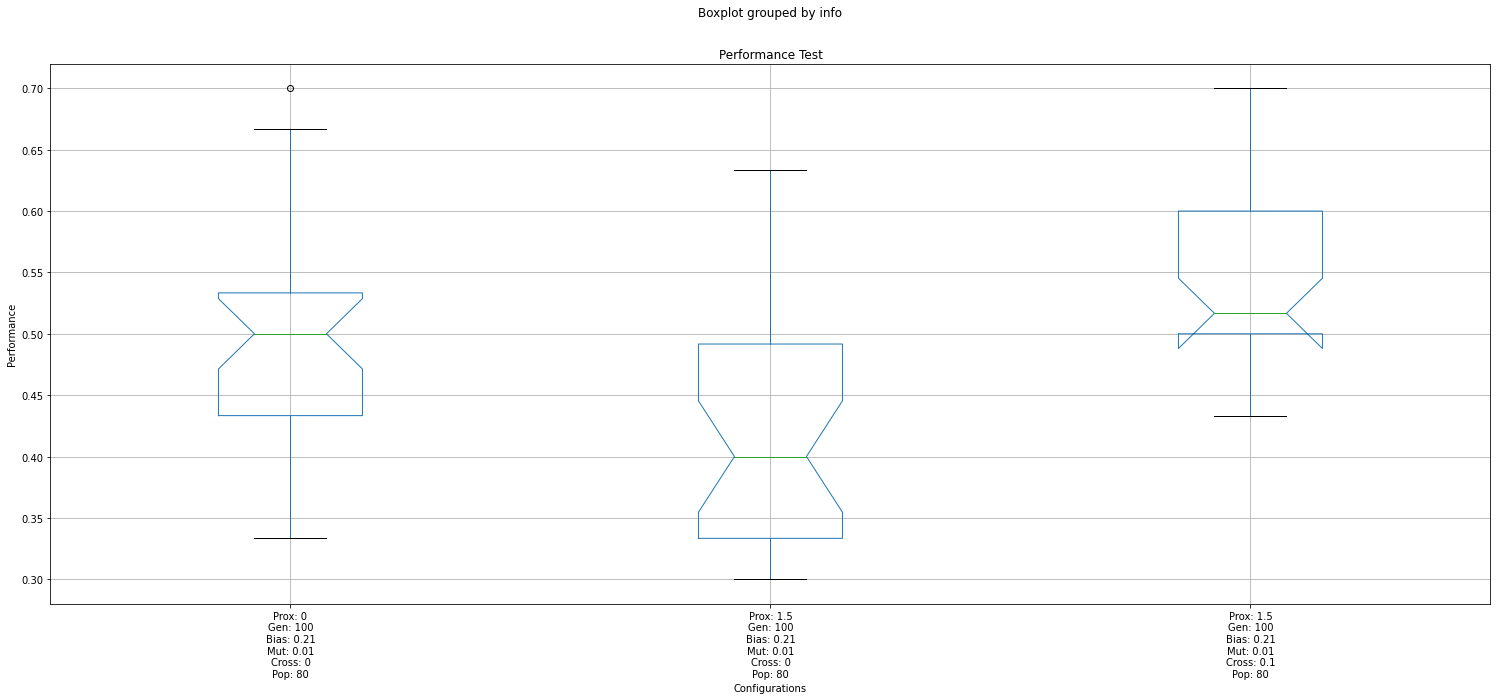

In [16]:
plot_test(
    statistics_folder + "result_task4_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_18-14_26-01.csv",
    statistics_folder + "result_task4_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0_el5_trials3_19-52_26-01.csv",
    #statistics_folder + "result_task4_nodes50_k3_bias0.21_prox0_p80_g100_pM0.01_pC0.1_el5_trials3_21-11_26-01.csv",
    statistics_folder + "result_task4_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0.1_el5_trials3_22-24_26-01.csv"
)

In [29]:
filename = r'c:/users/andrea petreti/documents/tesi_robotics/statistics/task1/task1_nodes50_k3_bias0.21_prox1.5_p80_g100_pM0.01_pC0_el5_trials3_10-41_20-01.csv'
data = pd.read_csv(filename, ";", skiprows=1, index_col=False, names=csv_header)
data = data.drop_duplicates(subset='genome', keep="last")
print(len(data))
data = data.loc[data['generation'] == 100]
data = data.drop_duplicates(subset='genome', keep="last")
data

1563


,generation,fitness,score,genome
8000,100,0.911111,0,0100010000010010011000000111101010101000000011...
8001,100,0.911111,0,0100011010010010011000000110101100101001000010...
8002,100,0.911111,0,0100010010100010011000000111100010101000000011...
8003,100,0.900000,0,0100010001000111011000010110101000001001000011...
8004,100,0.888889,0,0100010000010010011000000111100010101000000011...
...,...,...,...,...
8075,100,0.855556,0,0100001000010110001100000110101010000001000011...
8076,100,0.855556,0,0110010001000011011000000110111100001011010011...
8077,100,0.855556,0,0100000000010011011101000110101010011000000001...
8078,100,0.844444,0,0100010000010010011000000010101100101001000010...
